### Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm

### Configuration

In [62]:
EXPERIMENT = "tara"
MODE = "test"
ACTIVITIES = ["relaxing", "eating", "walking", "studying"]
simple_distance_based_outlier_columns = [
    'accel_z', 'accel_y', 'accel_x',
    'gyro_z', 'gyro_y', 'gyro_x',
    'magne_z', 'magne_y', 'magne_x',
]
local_outlier_factor_columns = [
    'gps_altitude', 'gps_latitude', 'gps_longitude',
    'gravity_z', 'gravity_y', 'gravity_x',
    'bar_relativeAltitude', 'bar_pressure',
    'ori_qz', 'ori_qy', 'ori_qx', 'ori_qw'
]

### Dataset

In [63]:
dataset: pd.DataFrame = pd.read_csv(f"datasets/{EXPERIMENT}_{MODE}.csv")
dataset

,accel_z,accel_y,accel_x,gyro_z,gyro_y,gyro_x,gravity_z,gravity_y,gravity_x,ori_qz,...,bar_relativeAltitude,bar_pressure,gps_altitude,gps_latitude,gps_longitude,time,walking,relaxing,eating,studying
0,-0.023840,0.018390,0.008858,-0.054503,-0.005479,0.011691,-7.563114,-5.831582,-2.216261,0.663099,...,0.015858,1018.030701,40.507936,52.047900,4.382954,2023-06-16 15:39:53.073135400,1,0,0,0
1,0.002951,0.022089,-0.041490,-0.070068,0.088273,-0.000520,-7.004715,-6.675822,-1.343320,0.653123,...,0.026424,1018.029251,40.643834,52.047898,4.382956,2023-06-16 15:39:54.073135400,1,0,0,0
2,0.083199,-0.117540,0.250466,0.099236,-0.050622,-0.041580,-7.546371,-6.011996,-1.740925,0.642579,...,0.036995,1018.027916,40.755786,52.047895,4.382956,2023-06-16 15:39:55.073135400,1,0,0,0
3,-0.024142,-0.041310,-0.124078,0.268303,0.292325,0.254841,-7.262949,-6.160909,-2.257083,0.731410,...,0.047565,1018.026657,40.815552,52.047892,4.382956,2023-06-16 15:39:56.073135400,1,0,0,0
4,-0.343633,0.325876,0.097991,-0.121707,-0.284418,-0.060837,-6.545389,-6.867339,-2.387059,0.749090,...,0.036995,1018.028030,40.865129,52.047893,4.382956,2023-06-16 15:39:57.073135400,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,-0.027468,-0.002052,-0.012776,0.062467,0.000044,-0.000010,-9.806233,0.083322,0.035022,-0.157359,...,6.013920,1017.307434,41.530131,52.045304,4.384525,2023-06-16 16:38:53.073135400,0,0,0,1
3541,-0.029051,0.008580,0.018632,0.031754,-0.000316,-0.000033,-9.806244,0.079065,0.040456,-0.117536,...,6.013920,1017.307434,41.530131,52.045304,4.384525,2023-06-16 16:38:54.073135400,0,0,0,1
3542,-0.028269,0.002606,0.002662,-0.000234,-0.000159,0.000208,-9.806221,0.082902,0.039185,-0.113216,...,6.024490,1017.306366,41.530131,52.045304,4.384525,2023-06-16 16:38:55.073135400,0,0,0,1
3543,-0.028832,0.002296,0.002630,0.023920,0.000002,-0.000178,-9.806213,0.083961,0.039061,-0.108622,...,NaN,NaN,41.530131,52.045304,4.384525,2023-06-16 16:38:56.073135400,0,0,0,1


### Visualization

#### Overview

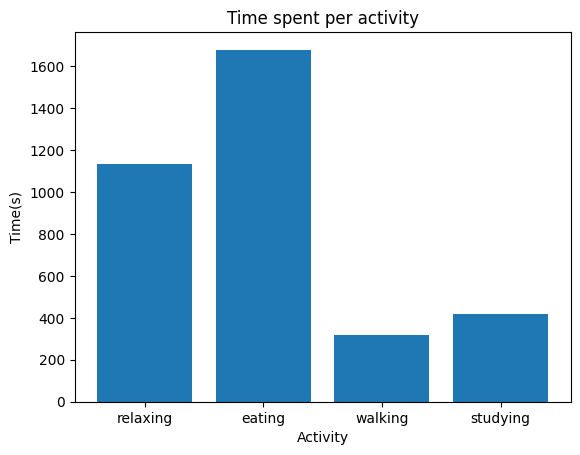

In [64]:
activities_count: pd.DataFrame = pd.DataFrame(
    dataset[ACTIVITIES].sum(),
    columns=['Sum']
)

plt.bar(activities_count.index, activities_count['Sum'])
plt.xlabel('Activity')
plt.ylabel('Time(s)')
plt.title('Time spent per activity')
plt.show()

#### Accelerometer

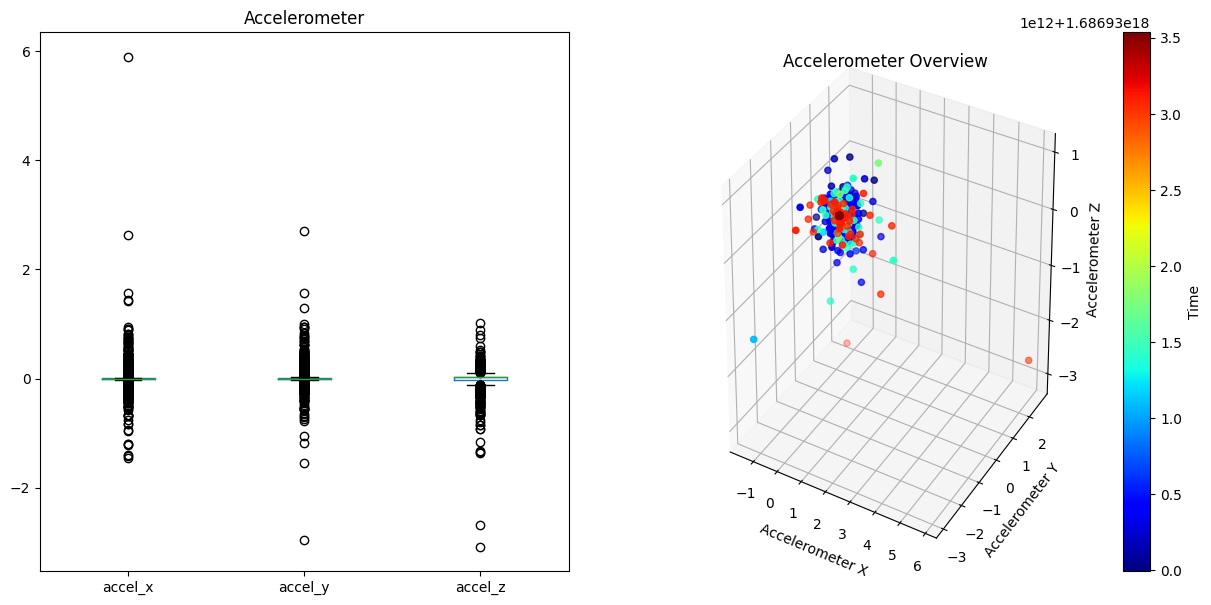

In [65]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# -------- Box plot
dataset[['accel_x', 'accel_y', 'accel_z']].plot.box(ax=ax1)
ax1.set_title("Accelerometer")

# -------- Scatter plot
sc = ax2.scatter(
    dataset['accel_x'],
    dataset['accel_y'],
    dataset['accel_z'],
    c=pd.to_datetime(dataset['time']).astype(int),
    cmap=cm.jet
)
ax2.set_xlabel('Accelerometer X')
ax2.set_ylabel('Accelerometer Y')
ax2.set_zlabel('Accelerometer Z')
ax2.set_title('Accelerometer Overview')
cbar = plt.colorbar(sc, ax=ax2)
cbar.set_label('Time')
plt.show()

#### Gravity

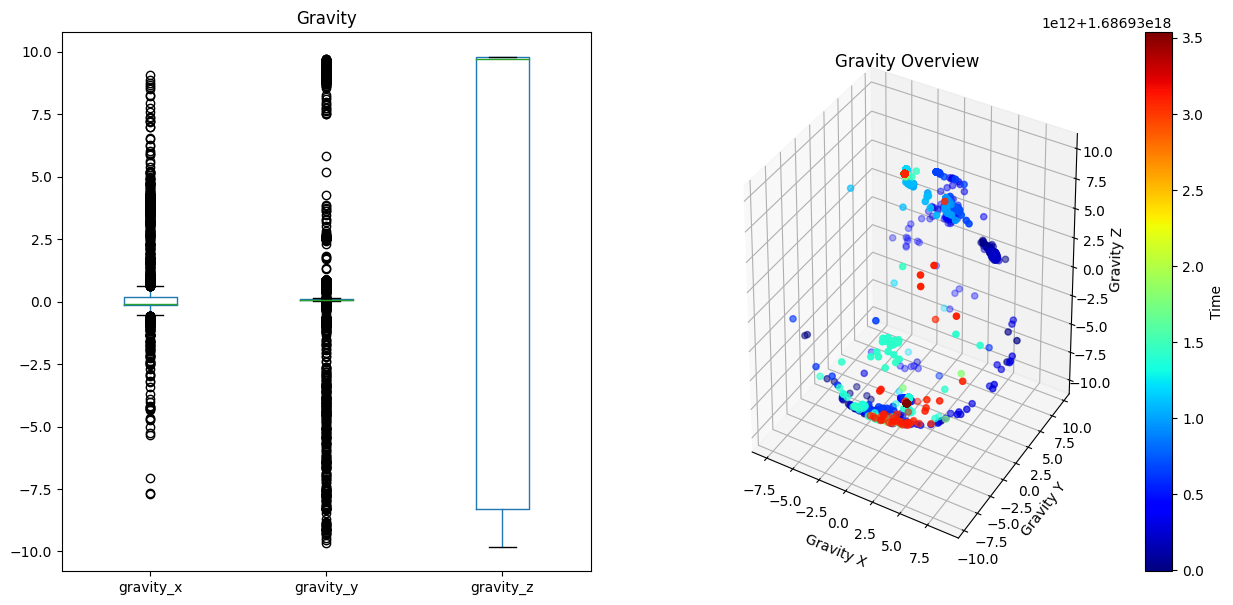

In [66]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# -------- Box plot
dataset[['gravity_x', 'gravity_y', 'gravity_z']].plot.box(ax=ax1)
ax1.set_title("Gravity")

# -------- Scatter plot
sc = ax2.scatter(
    dataset['gravity_x'],
    dataset['gravity_y'],
    dataset['gravity_z'],
    c=pd.to_datetime(dataset['time']).astype(int),
    cmap=cm.jet
)
ax2.set_xlabel('Gravity X')
ax2.set_ylabel('Gravity Y')
ax2.set_zlabel('Gravity Z')
ax2.set_title('Gravity Overview')
cbar = plt.colorbar(sc, ax=ax2)
cbar.set_label('Time')
plt.show()

#### Gyroscope

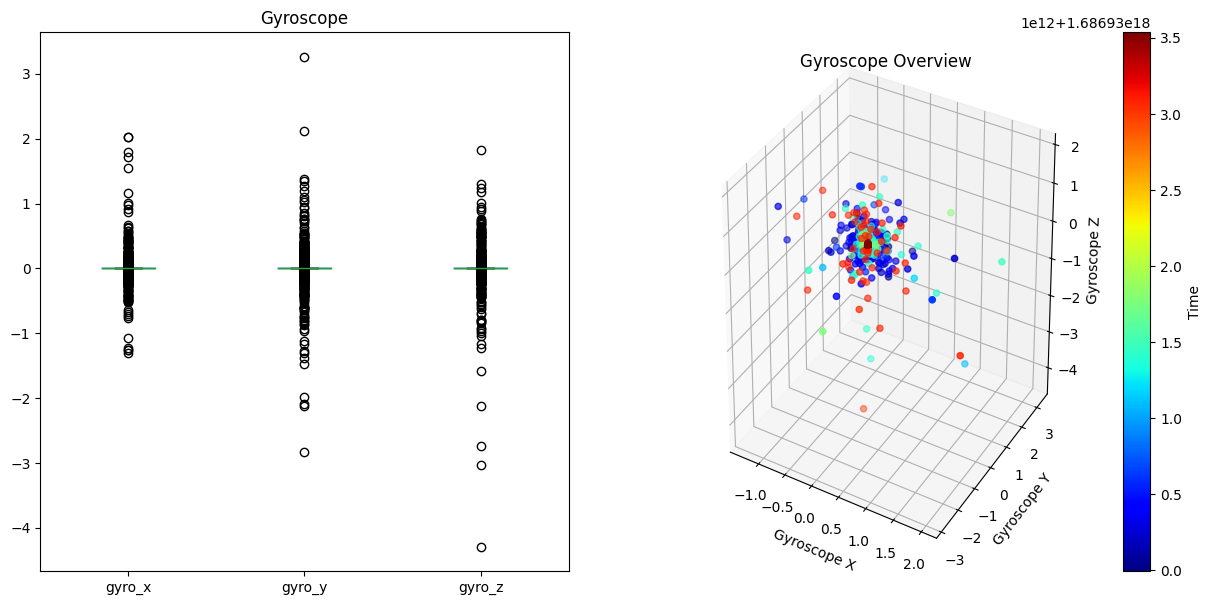

In [67]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# -------- Box plot
dataset[['gyro_x', 'gyro_y', 'gyro_z']].plot.box(ax=ax1)
ax1.set_title("Gyroscope")

# -------- Scatter plot
sc = ax2.scatter(
    dataset['gyro_x'],
    dataset['gyro_y'],
    dataset['gyro_z'],
    c=pd.to_datetime(dataset['time']).astype(int),
    cmap=cm.jet
)
ax2.set_xlabel('Gyroscope X')
ax2.set_ylabel('Gyroscope Y')
ax2.set_zlabel('Gyroscope Z')
ax2.set_title('Gyroscope Overview')
cbar = plt.colorbar(sc, ax=ax2)
cbar.set_label('Time')
plt.show()

#### Orientation

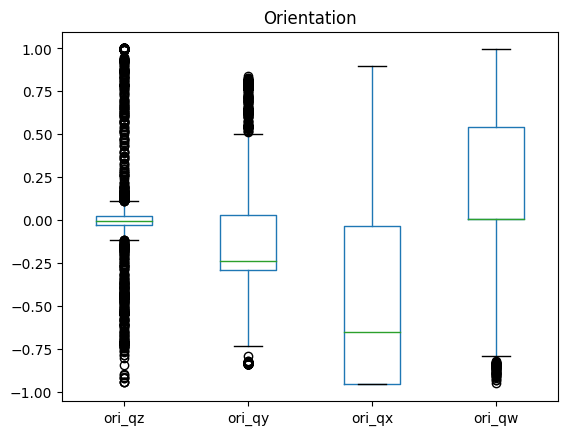

In [68]:
plt.Figure()
dataset[["ori_qz", "ori_qy", "ori_qx", "ori_qw"]].plot.box()
plt.title("Orientation")
plt.show()

#### Magnetometer

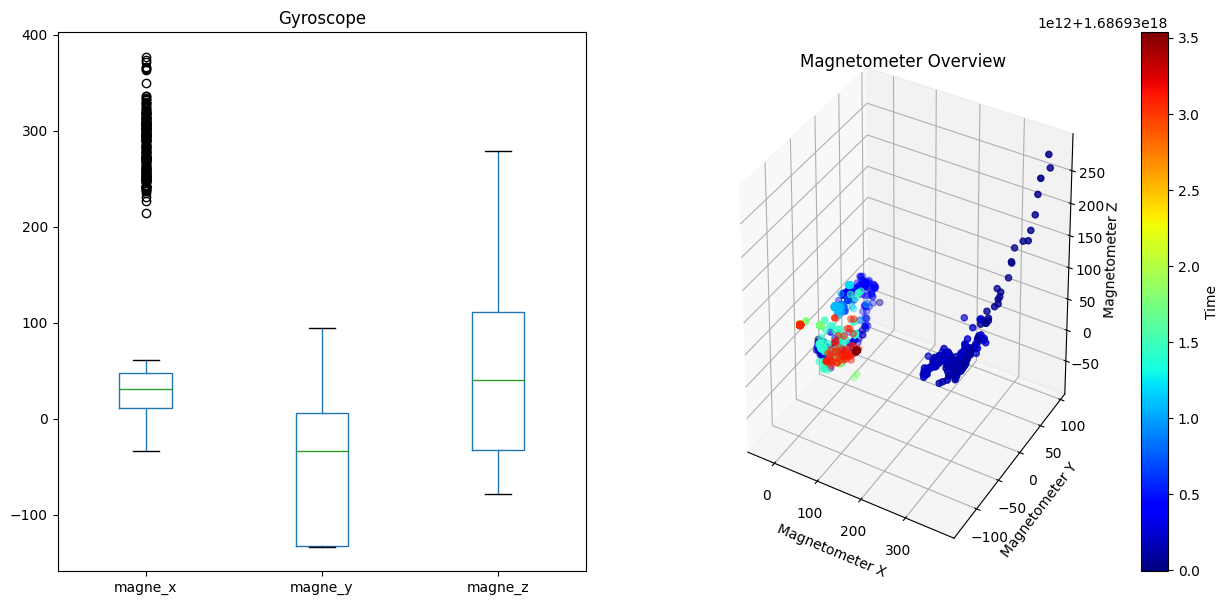

In [69]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# -------- Box plot
dataset[['magne_x', 'magne_y', 'magne_z']].plot.box(ax=ax1)
ax1.set_title("Gyroscope")

# -------- Scatter plot
ax2.scatter(
    dataset['magne_x'],
    dataset['magne_y'],
    dataset['magne_z'],
    c=pd.to_datetime(dataset['time']).astype(int),
    cmap=cm.jet
)
ax2.set_xlabel('Magnetometer X')
ax2.set_ylabel('Magnetometer Y')
ax2.set_zlabel('Magnetometer Z')
ax2.set_title('Magnetometer Overview')
cbar = plt.colorbar(sc, ax=ax2)
cbar.set_label('Time')
plt.show()

#### Barometer

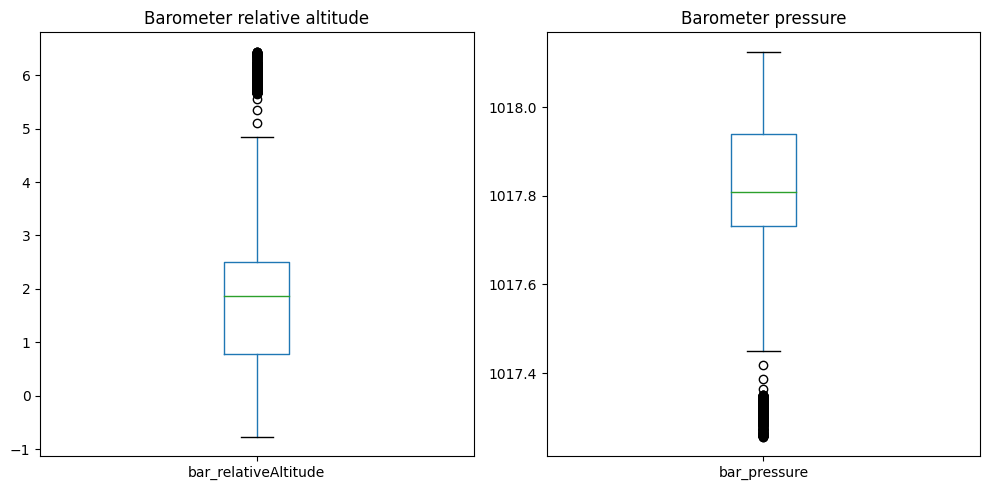

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

dataset[["bar_relativeAltitude"]].plot.box(ax=axes[0])
axes[0].set_title("Barometer relative altitude")

dataset[["bar_pressure"]].plot.box(ax=axes[1])
axes[1].set_title("Barometer pressure")

plt.tight_layout()
plt.show()

#### Location

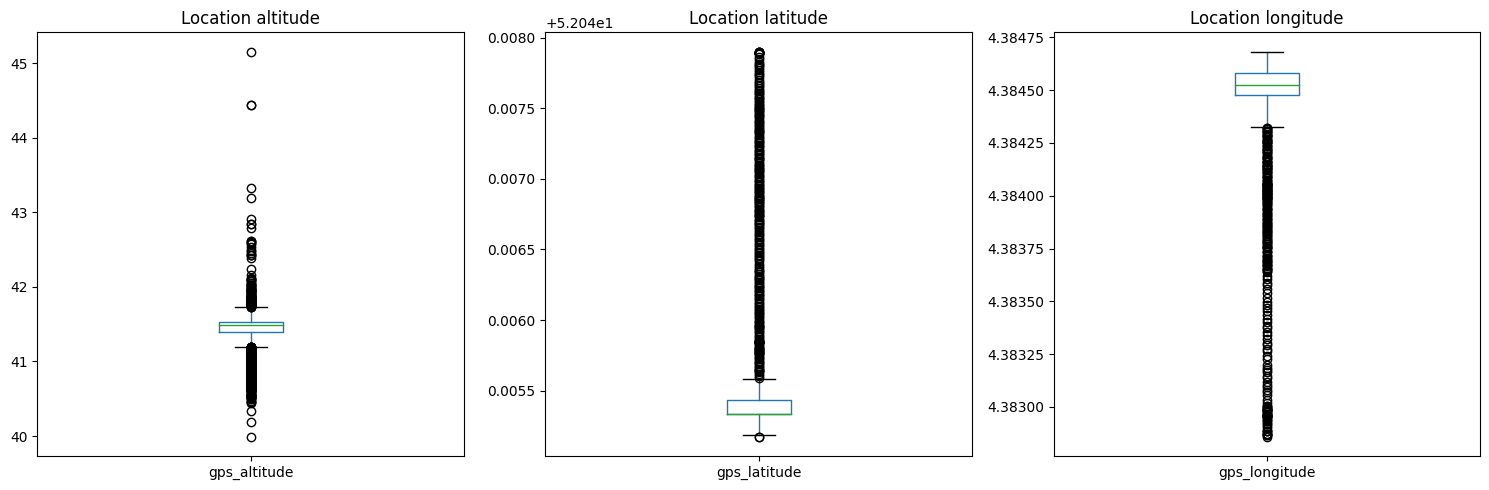

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

dataset[["gps_altitude"]].plot.box(ax=axes[0])
axes[0].set_title("Location altitude")

dataset[["gps_latitude"]].plot.box(ax=axes[1])
axes[1].set_title("Location latitude")

dataset[["gps_longitude"]].plot.box(ax=axes[2])
axes[2].set_title("Location longitude")

plt.tight_layout()
plt.show()

### Outlier removal

In [72]:
def print_missing_values_percentages(dataset: pd.DataFrame):
    columns = dataset.columns
    nan_percentages_per_column = []
    for column in columns:
        
        nan_values = dataset[column].isnull().sum()
        
        total_values = dataset.shape[0]
        
        percentage = (nan_values / total_values) * 100
        nan_percentages_per_column.append(
            percentage
        )

    sns.barplot(y=nan_percentages_per_column, x=dataset.columns)
    plt.xticks(rotation=90, size=6)
    plt.tight_layout()
    plt.show()

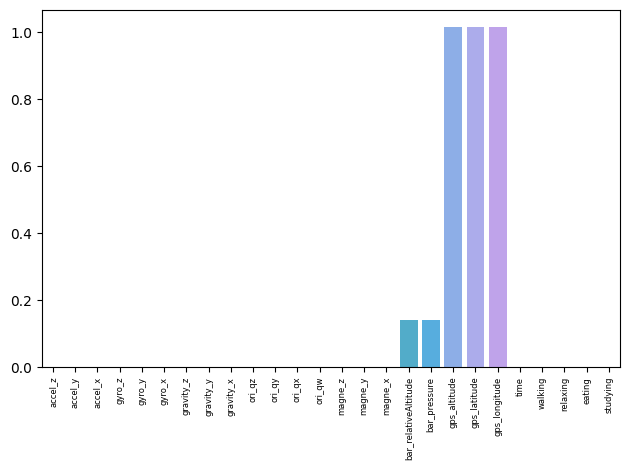

In [73]:
print_missing_values_percentages(dataset)

#### Simple distance based outlier detection

In [74]:
from book.Chapter3.OutlierDetection import DistanceBasedOutlierDetection

d_min = 0.1
f_min = 0.99

OutlierDist = DistanceBasedOutlierDetection()
for col in simple_distance_based_outlier_columns:
    try:
        dataset = OutlierDist.simple_distance_based(
            dataset, [col], 'euclidean', d_min, f_min)
        dataset.loc[dataset['simple_dist_outlier'] == True, col] = None
    except MemoryError as e:
        print(
            'Not enough memory available for simple distance-based outlier detection...')
        print('Skipping.')
dataset = dataset.drop('simple_dist_outlier', axis=1)

Calculating simple distance-based criterion.
Calculating simple distance-based criterion.
Calculating simple distance-based criterion.
Calculating simple distance-based criterion.
Calculating simple distance-based criterion.
Calculating simple distance-based criterion.
Calculating simple distance-based criterion.
Calculating simple distance-based criterion.
Calculating simple distance-based criterion.


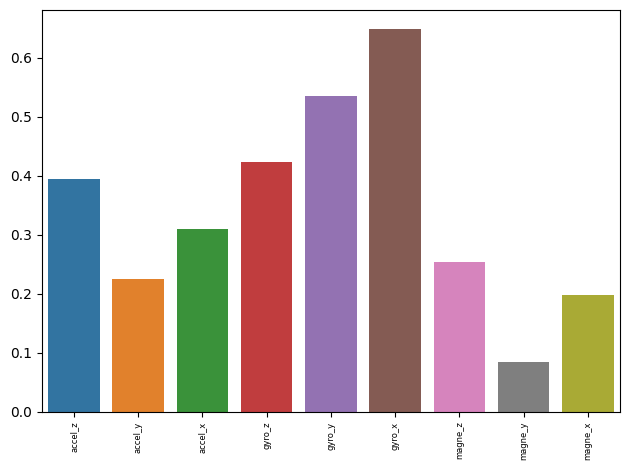

In [75]:
print_missing_values_percentages(dataset[simple_distance_based_outlier_columns])

#### Local outlier factor detection

In [77]:
from book.Chapter3.OutlierDetection import DistanceBasedOutlierDetection

k = 4

OutlierDist = DistanceBasedOutlierDetection()
for col in local_outlier_factor_columns:
    try:
        
        dataset = OutlierDist.local_outlier_factor(
            dataset, [col], 'euclidean', k
        )
        dataset.loc[dataset['lof'] == True, col] = None
    except MemoryError as e:
        print(
            'Not enough memory available for local outlier factor detection...'
        )
        print('Skipping.')
dataset = dataset.drop('lof', axis=1)

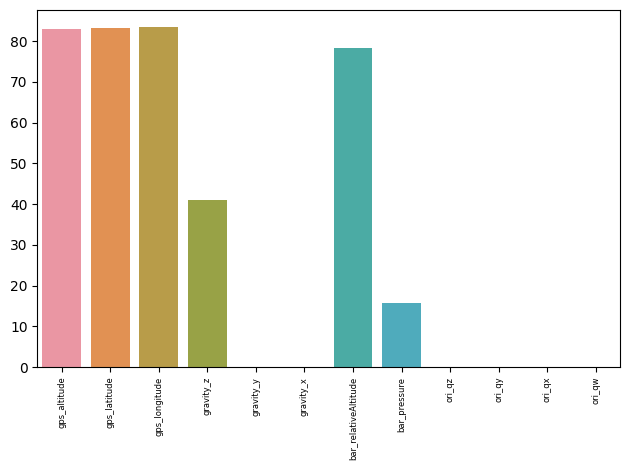

In [78]:
print_missing_values_percentages(dataset[local_outlier_factor_columns])

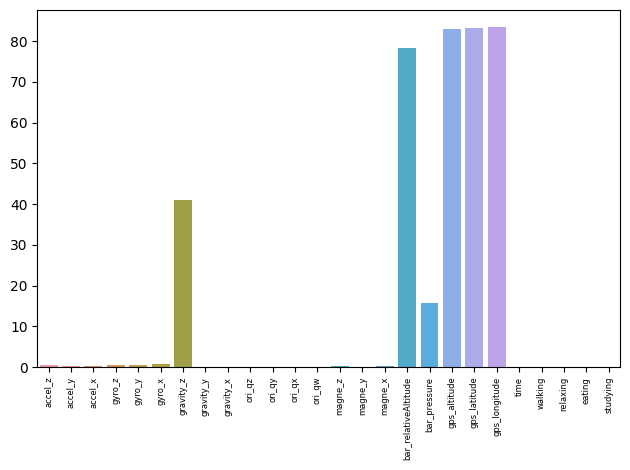

In [79]:
# simple distance based ~ 5 min
# local outlier factor ~ 133 min
# saving the state for faster further experimentation
print_missing_values_percentages(dataset)
dataset.to_csv(f"state/{EXPERIMENT}_{MODE}_outliers_removed.csv", index=False)